In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input, LSTM, Dense, Embedding, Conv1D, MaxPooling1D
from tensorflow.keras.preprocessing import sequence

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
# load the dataset but only keep the top n words, zero the rest
# The IMDB dataset is a set of 50,000 highly polarized reviews from the Internet 
# Movie Database. Each set contains an equal number (50%) of positive and negative 
# reviews. They are split into 25000 reviews each for training and testing
top_words = 5000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=top_words)

17464789/17464789 [==============================] - 0s 0us/step


In [ ]:
# truncate and pad input sequences to ensure the vectors have the same length 
# although the length of the individual content can be different
max_review_length = 500
x_train = sequence.pad_sequences(x_train, maxlen=max_review_length)
x_test = sequence.pad_sequences(x_test, maxlen=max_review_length)

In [ ]:
# Build LSTM
# The first layer is the Embedded layer that uses the vectors with length of 32 
# to present each word
# The second layer is the LSTM layer with 100 units
# The output layer is Dense layer since this is a classification problem. 
# Because this is a binary classification, we can use sigmoid instead of softmax
model = Sequential()
embedding_vecor_length = 32 #can change around
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model.add(LSTM(100))  #can change, explore other arguments
model.add(Dense(1, activation='sigmoid'))
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 500, 32)           160000    
                                                                 
 lstm_1 (LSTM)               (None, 100)               53200     
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 213,301
Trainable params: 213,301
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# Compile and train the learning model
adam = optimizers.Adam(lr=0.001)  #determined based on type of problem

model.compile(adam, loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=3, batch_size=64)

Epoch 1/3
391/391 [==============================] - 73s 168ms/step - loss: 0.5078 - accuracy: 0.7401 - val_loss: 0.3579 - val_accuracy: 0.8458
Epoch 2/3
391/391 [==============================] - 33s 83ms/step - loss: 0.3221 - accuracy: 0.8683 - val_loss: 0.3433 - val_accuracy: 0.8642
Epoch 3/3
391/391 [==============================] - 21s 54ms/step - loss: 0.2727 - accuracy: 0.8914 - val_loss: 0.3269 - val_accuracy: 0.8644


782/782 - 6s - loss: 0.3269 - accuracy: 0.8644 - 6s/epoch - 8ms/step
0.8644000291824341


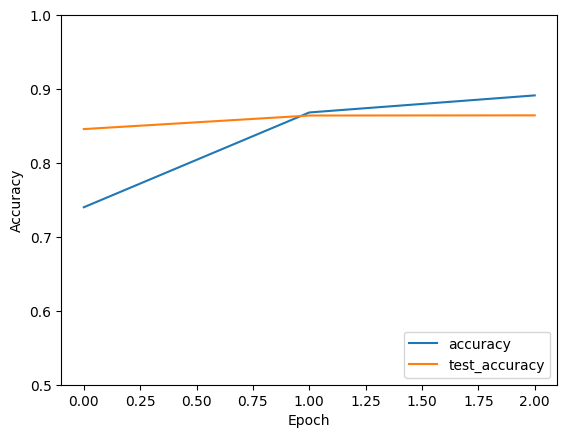

In [ ]:
# Evaluate the learning Model
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'test_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
print(test_acc)